<a href="https://colab.research.google.com/github/061095/biblioteca_pandas_/blob/main/Classifica%C3%A7%C3%A3o_de_clientes_com_maior_risco_de_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from imblearn.over_sampling import SMOTE


# 1. Entendimento do Negócio
# O problema de churn é crítico para o banco, que quer identificar clientes em risco de sair.


# 2. Entendimento dos Dados

In [10]:
file_path = 'caminho_para_seu_arquivo/BankChurners.csv'
data = pd.read_csv("/content/Bank-Churners.csv (1).zip")

In [11]:
# Visualizar as primeiras linhas do dataframe
print(data.head())

   CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1       

In [12]:
# Exibir estatísticas descritivas
print(data.describe())

          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

In [13]:
# Verificar dados duplicados
duplicates = data.duplicated().sum()
print(f'Duplicates: {duplicates}')
data = data.drop_duplicates()

Duplicates: 0


# 3. Preparação dos Dados

In [14]:
# Lidando com valores ausentes
missing_values = data.isnull().sum()
print(missing_values)

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [15]:
# Converter a coluna alvo (Attrition_Flag) para valores binários
data['Attrition_Flag'] = data['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [16]:
# Listar colunas categóricas
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

In [17]:
# Aplicar Label Encoding nas colunas categóricas
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [18]:
# Aplicar Label Encoding nas colunas categóricas
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# 4. Modelagem

In [19]:
# Separar as características (X) e o alvo (y)
X = data.drop(columns=['Attrition_Flag'])
y = data['Attrition_Flag']

In [20]:
# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [21]:
# Aplicar SMOTE para balancear o conjunto de treino
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Treinar o modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# Fazer previsões no conjunto de teste
y_pred = rf_model.predict(X_test)

# 5. Avaliação

In [22]:
# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

Acurácia: 1.0
Matriz de Confusão:
[[2551    0]
 [   0  488]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2551
           1       1.00      1.00      1.00       488

    accuracy                           1.00      3039
   macro avg       1.00      1.00      1.00      3039
weighted avg       1.00      1.00      1.00      3039



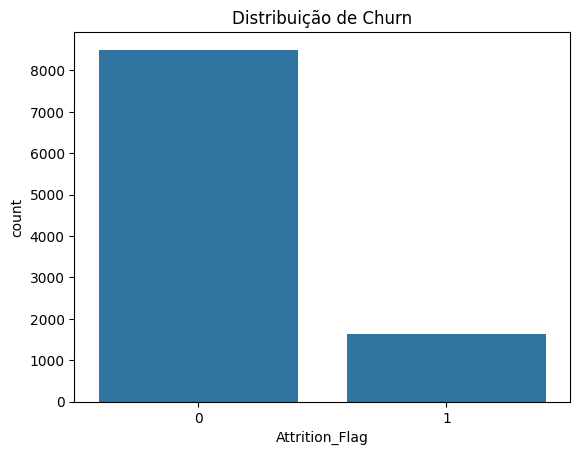

In [23]:
print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

# Visualizações gráficas
# Gráfico de distribuição de churn
sns.countplot(x='Attrition_Flag', data=data)
plt.title('Distribuição de Churn')
plt.show()

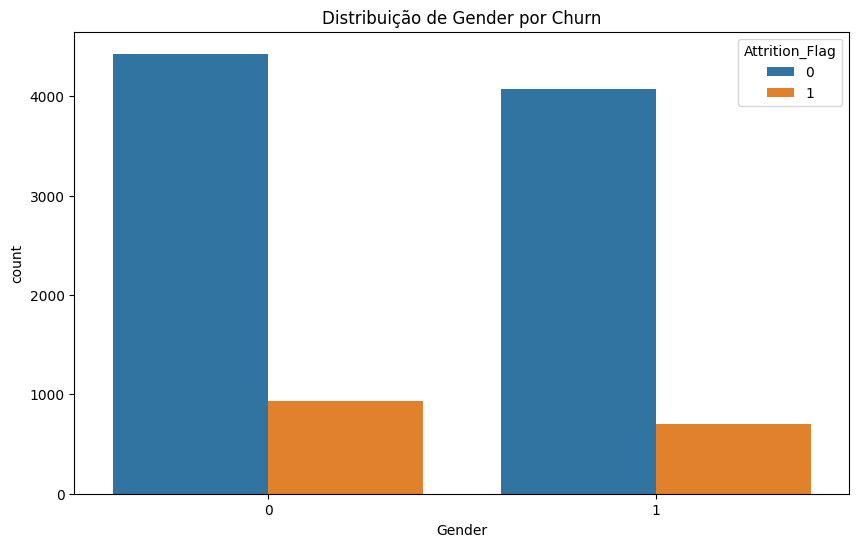

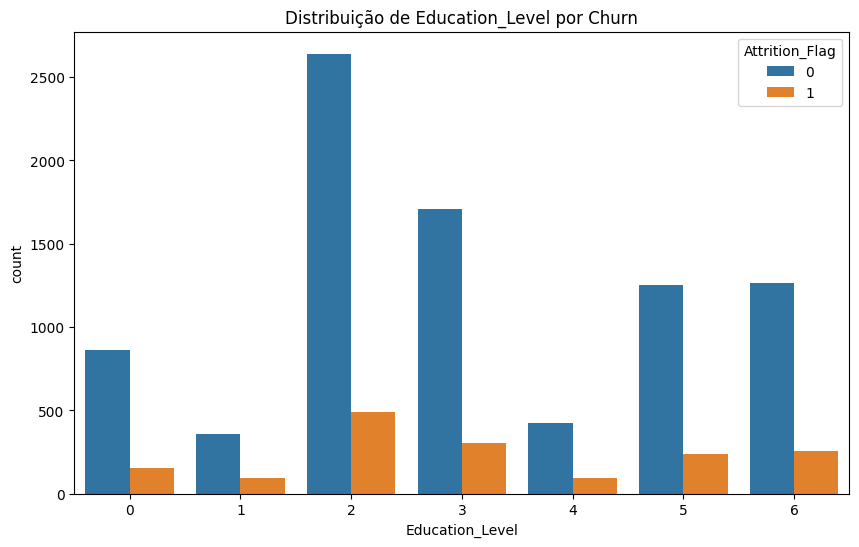

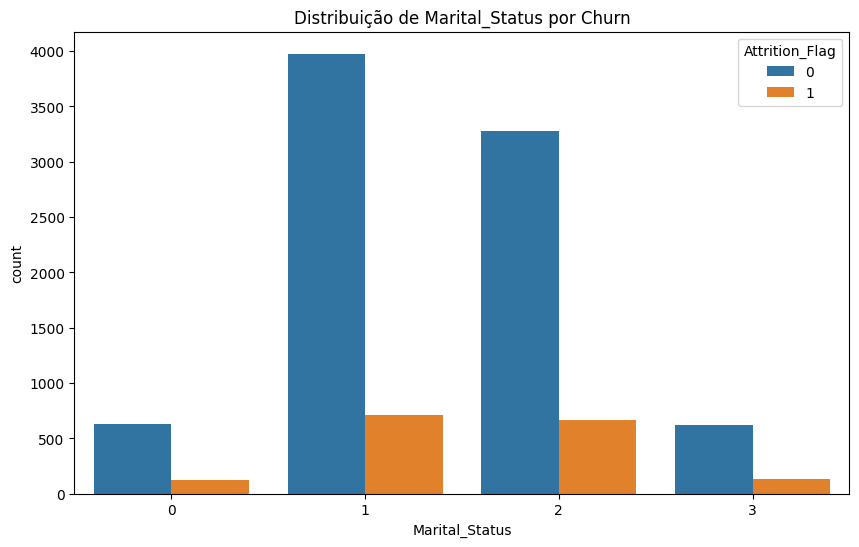

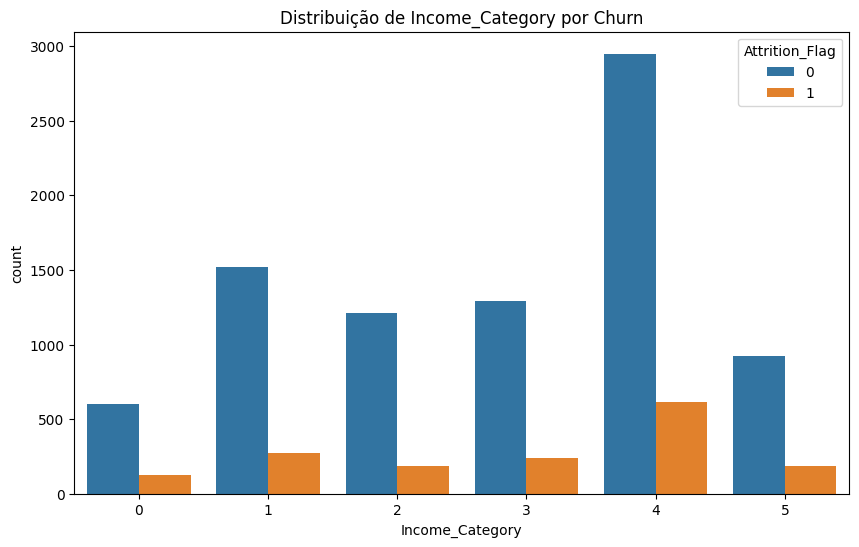

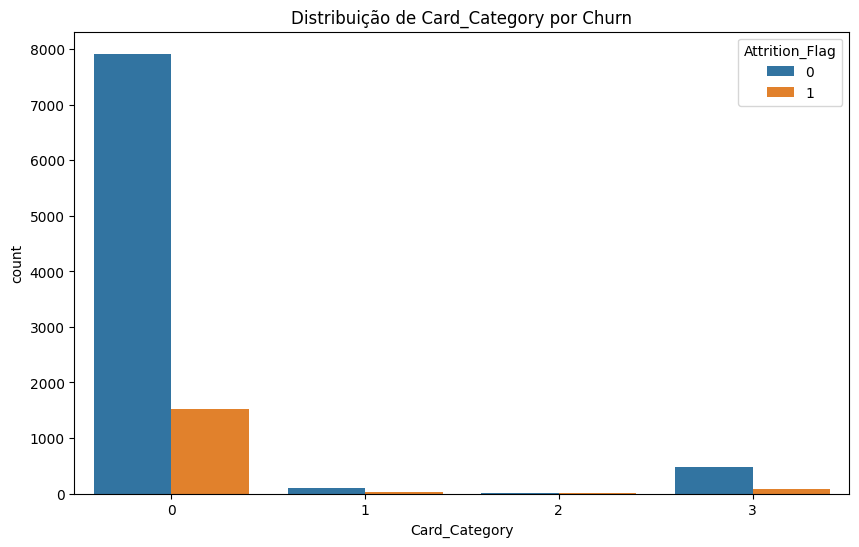

In [24]:
# Gráficos de distribuição de variáveis categóricas
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='Attrition_Flag', data=data)
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()

In [25]:
# Importância das características
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance = pd.Series(importances, index=feature_names).sort_values(ascending=False)


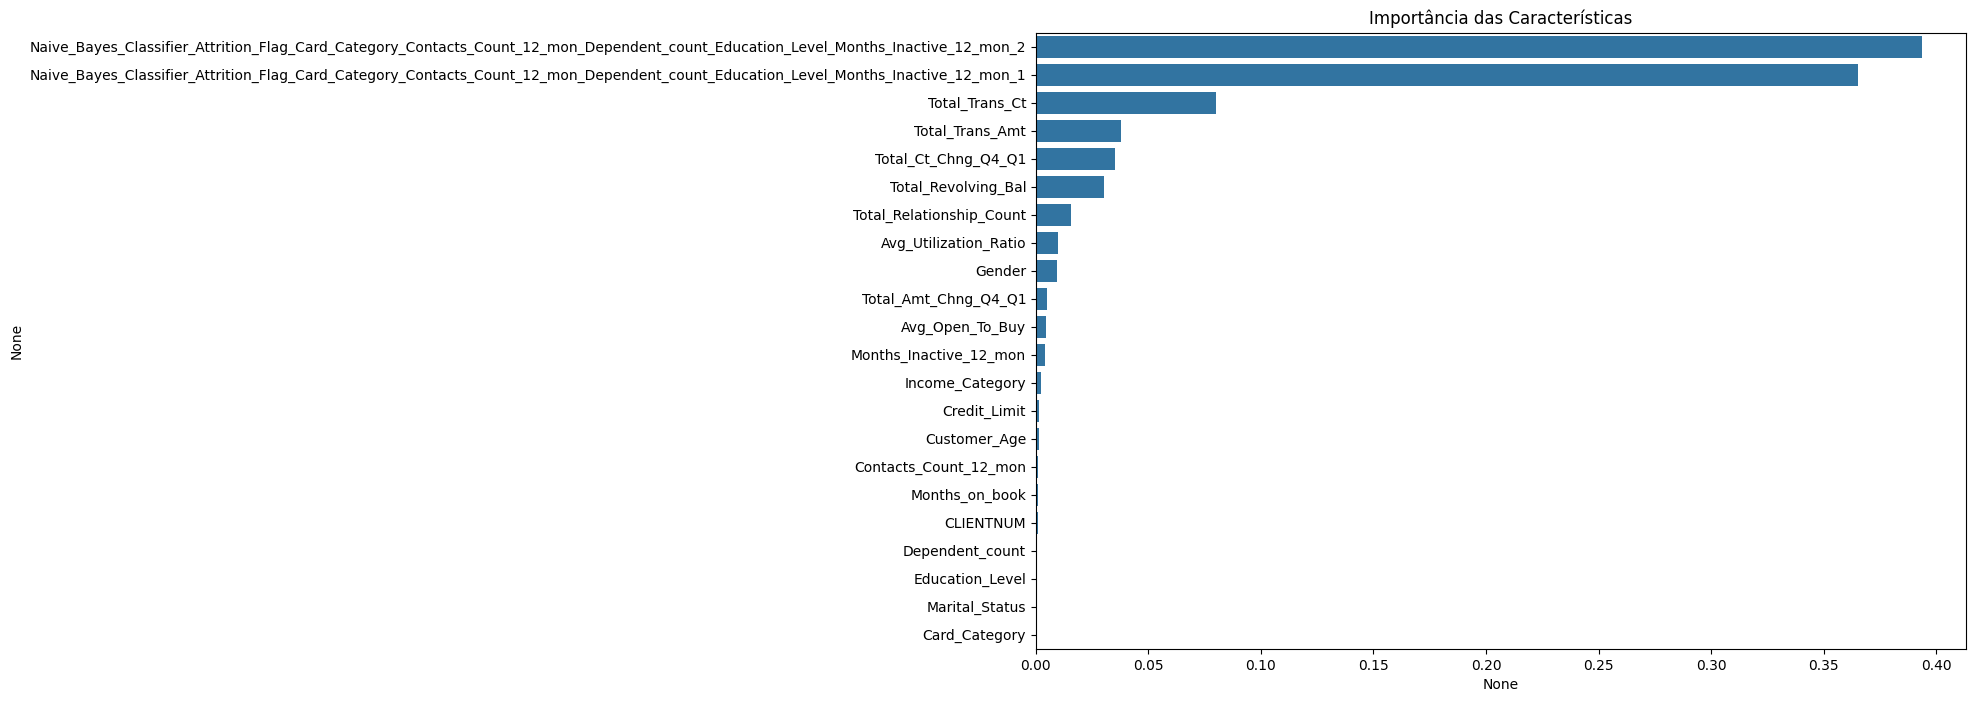

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Importância das Características')
plt.show()

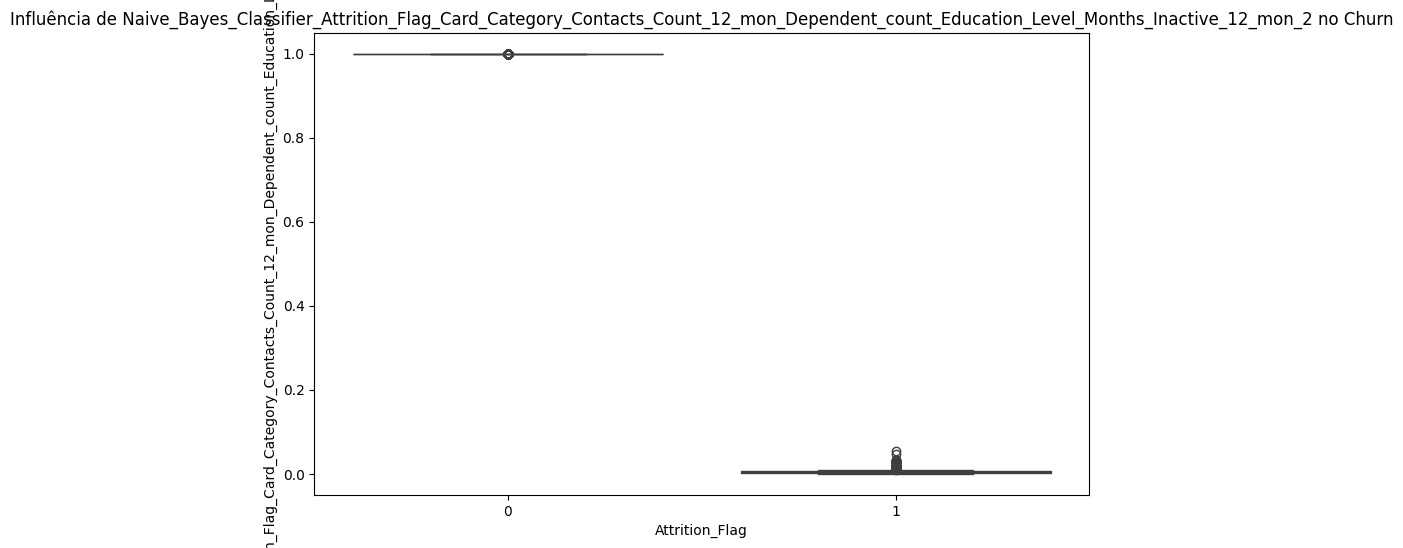

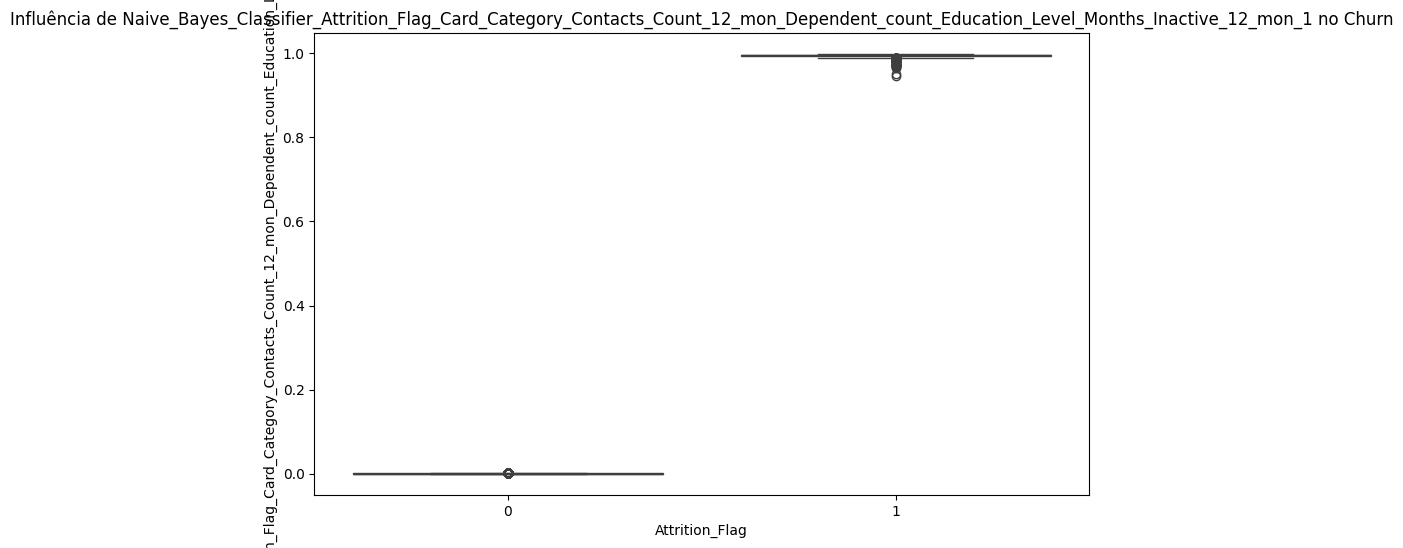

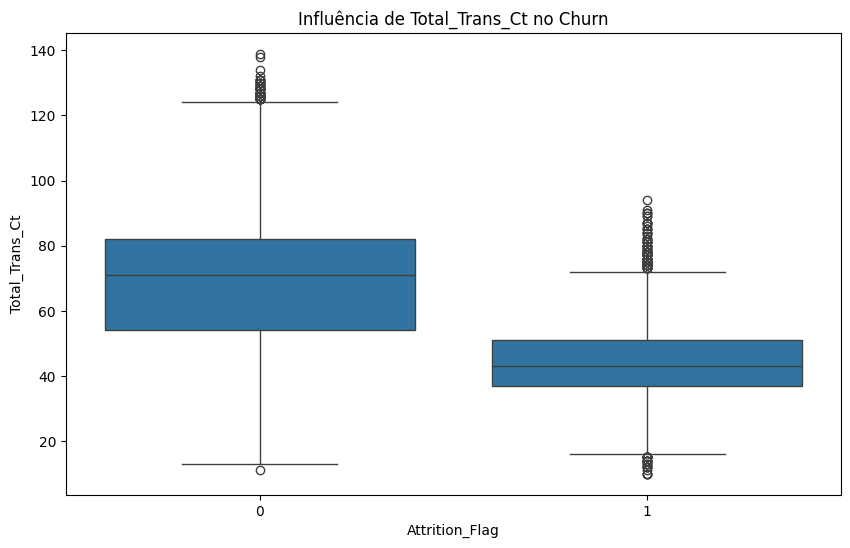

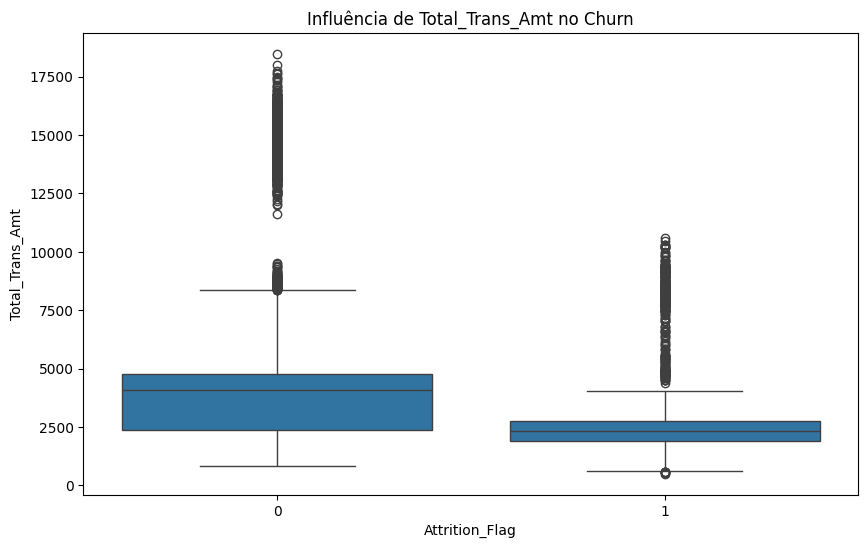

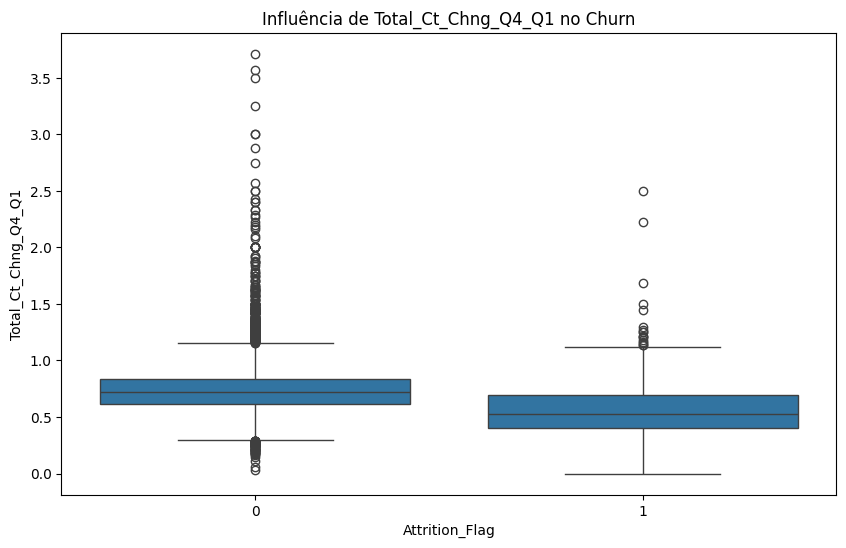

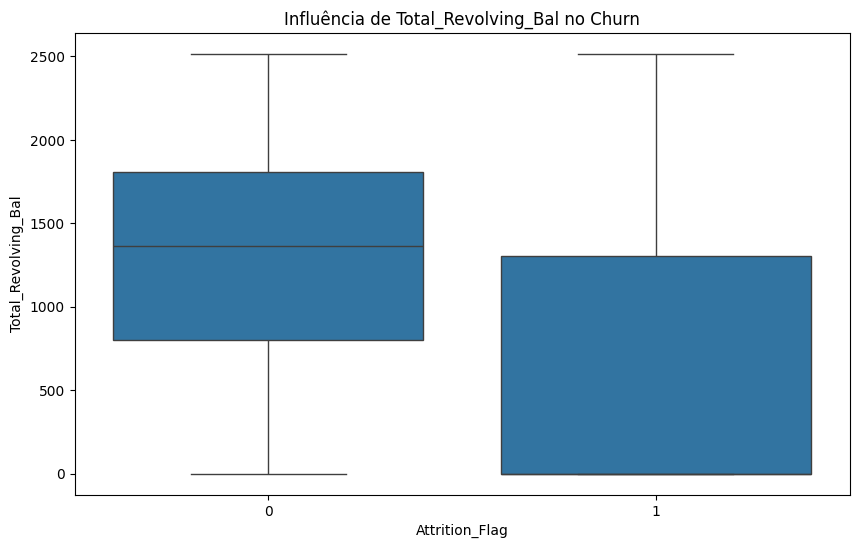

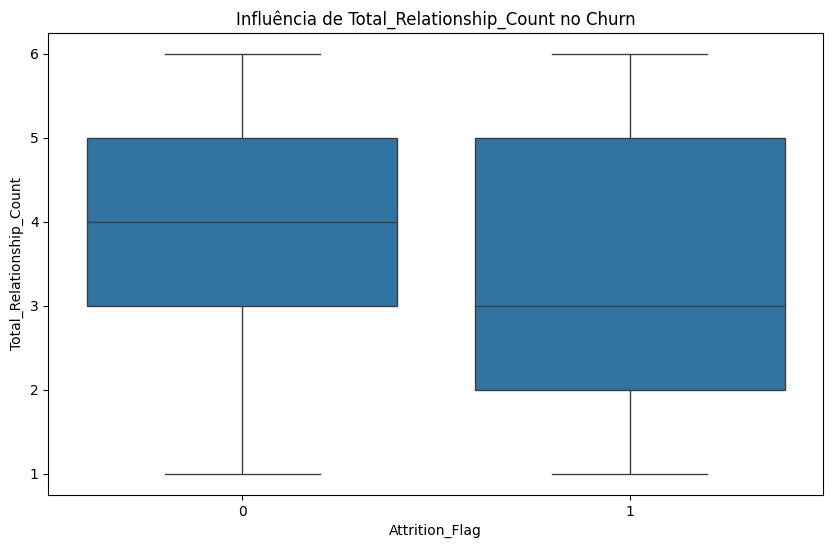

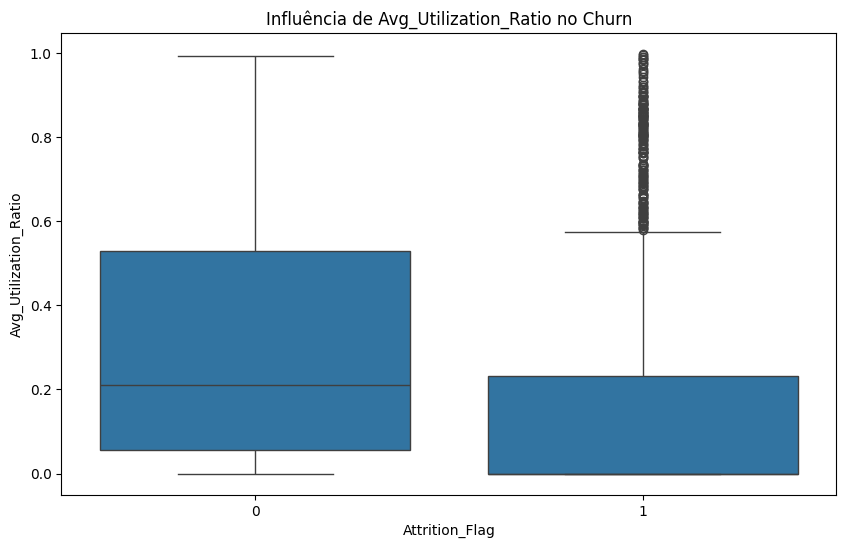

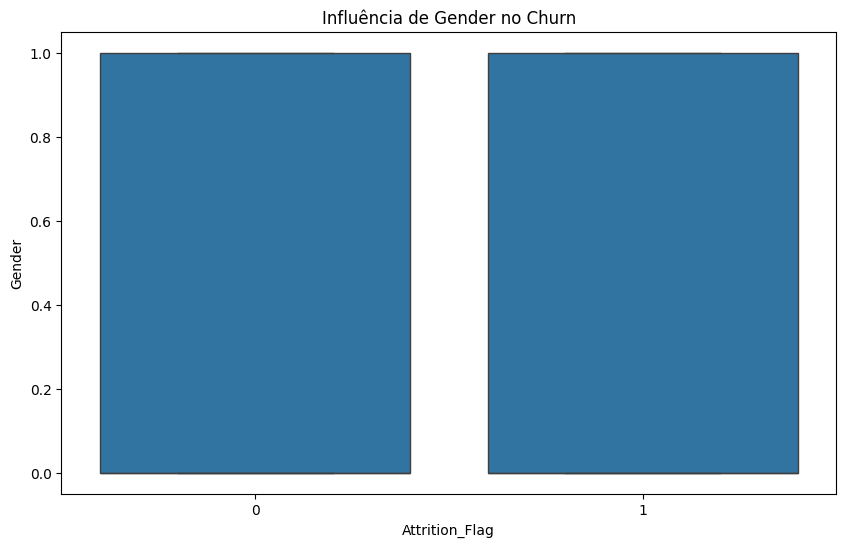

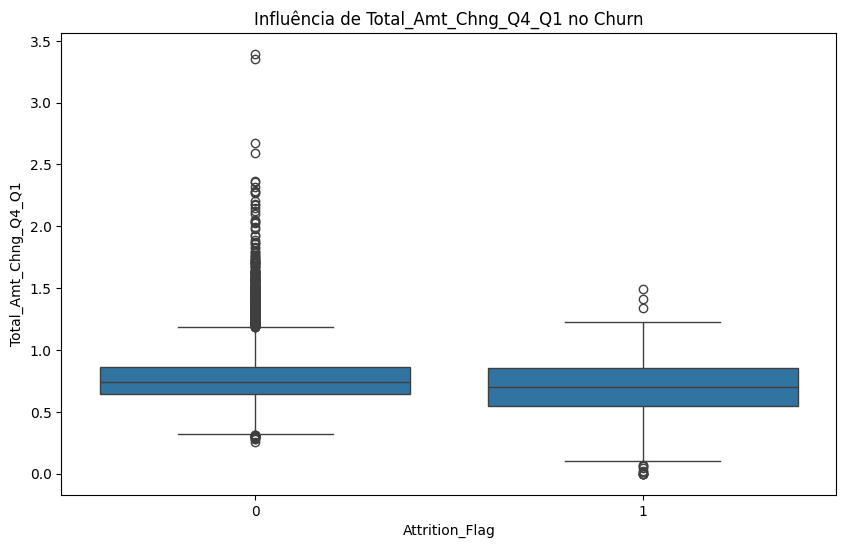

In [27]:
# Insights a partir das características mais importantes
top_features = feature_importance.head(10).index

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition_Flag', y=feature, data=data)
    plt.title(f'Influência de {feature} no Churn')
    plt.show()

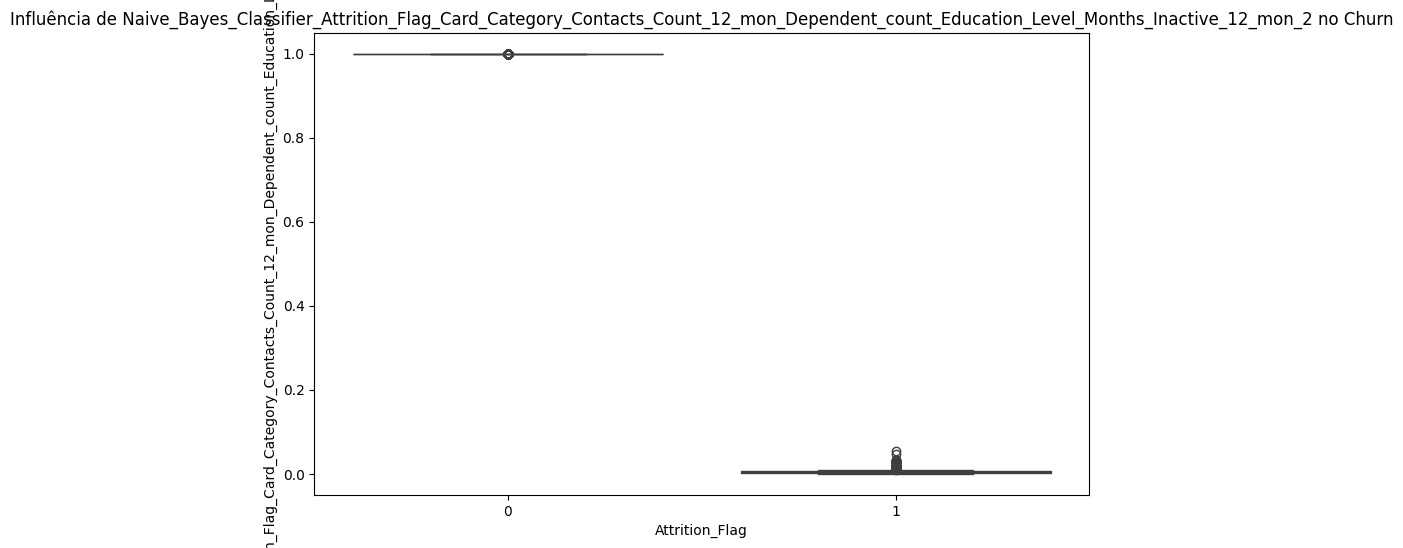

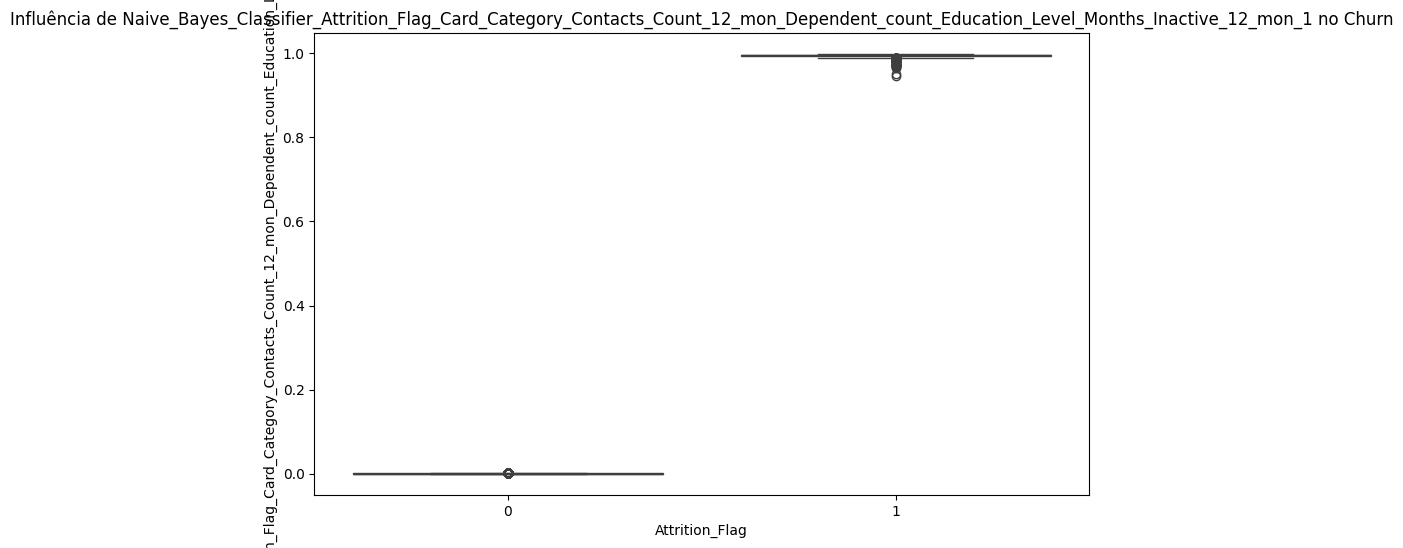

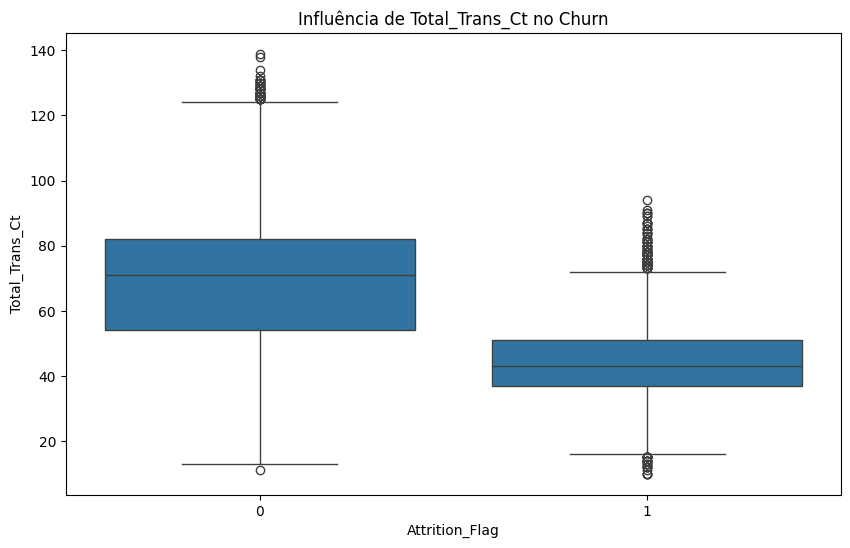

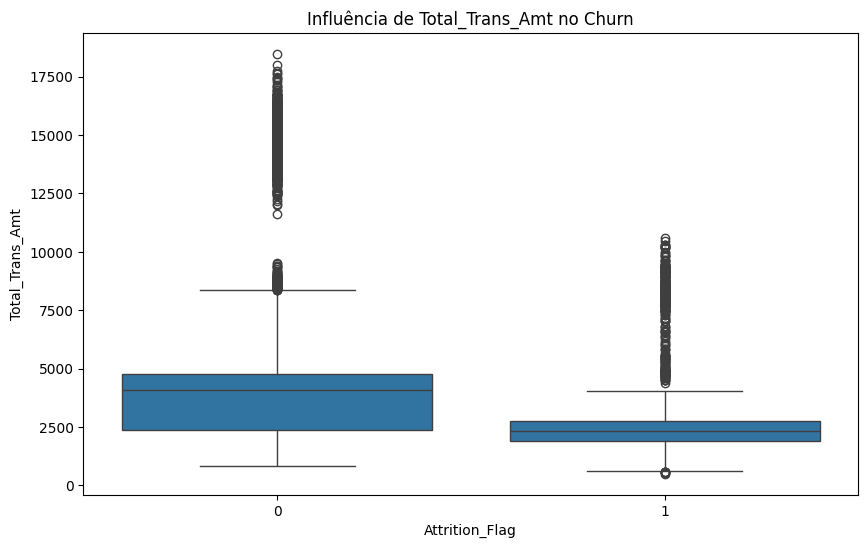

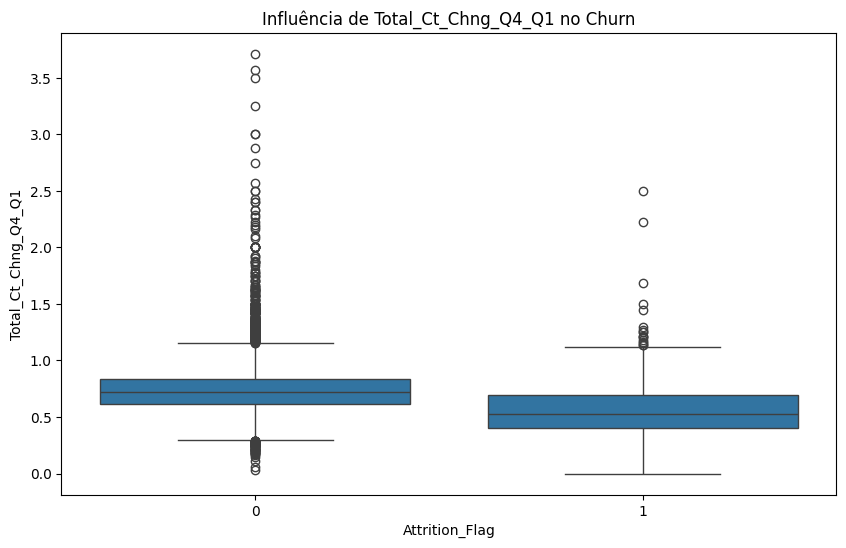

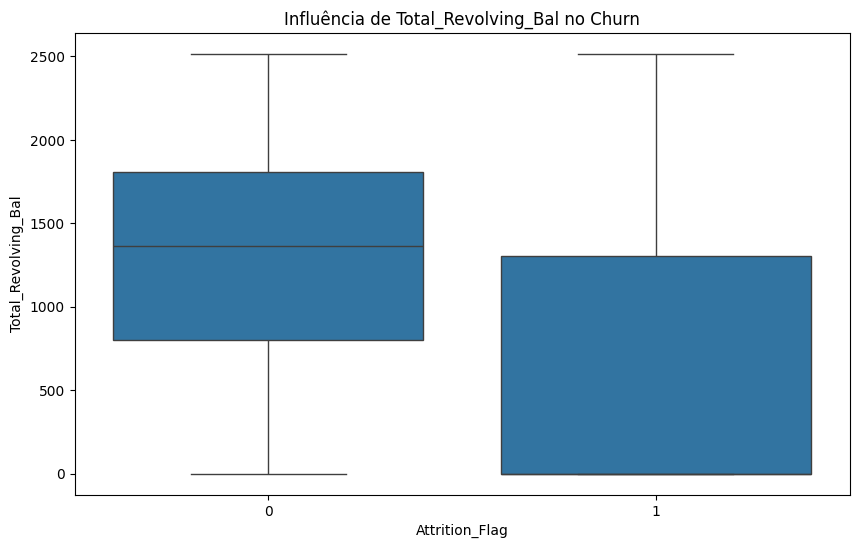

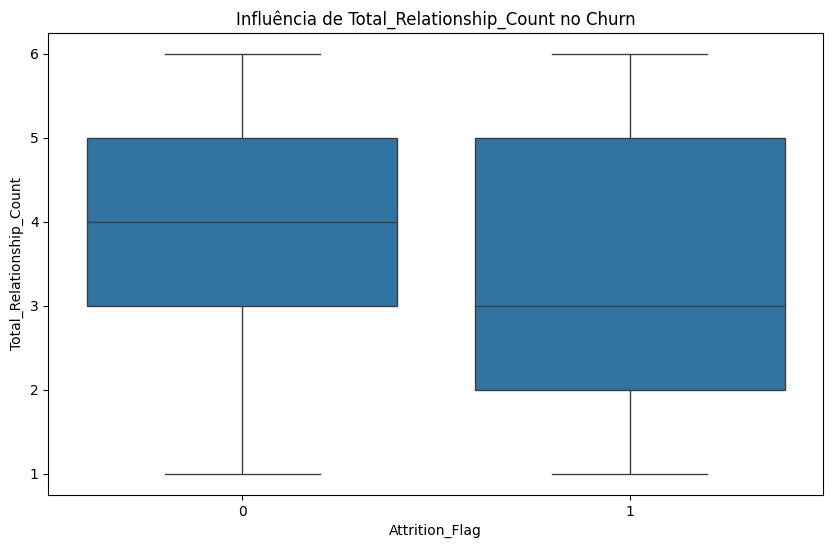

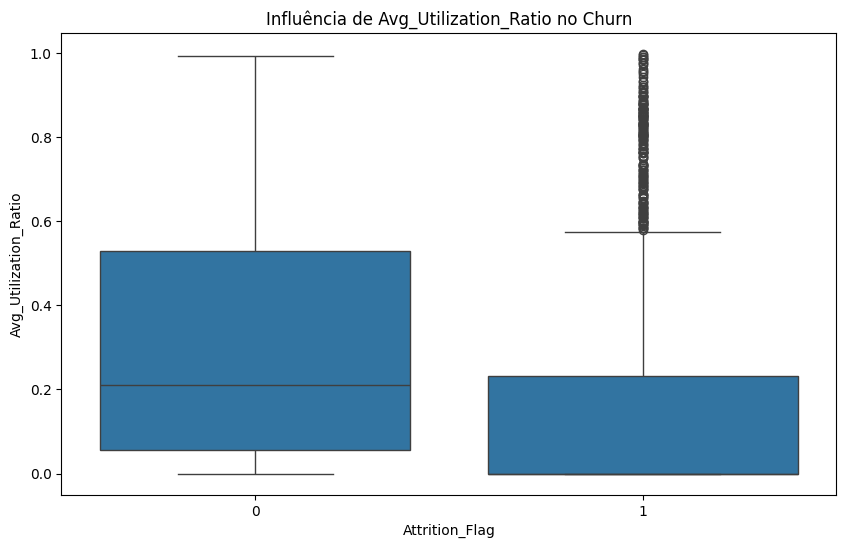

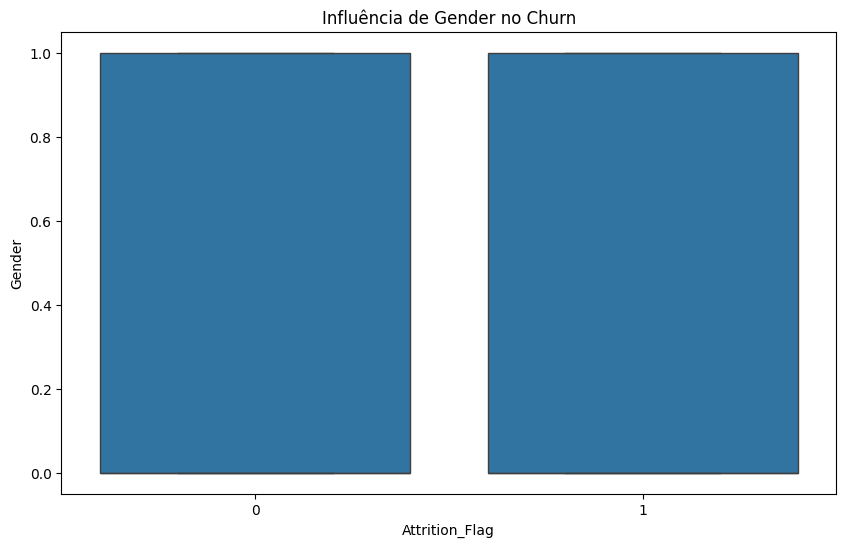

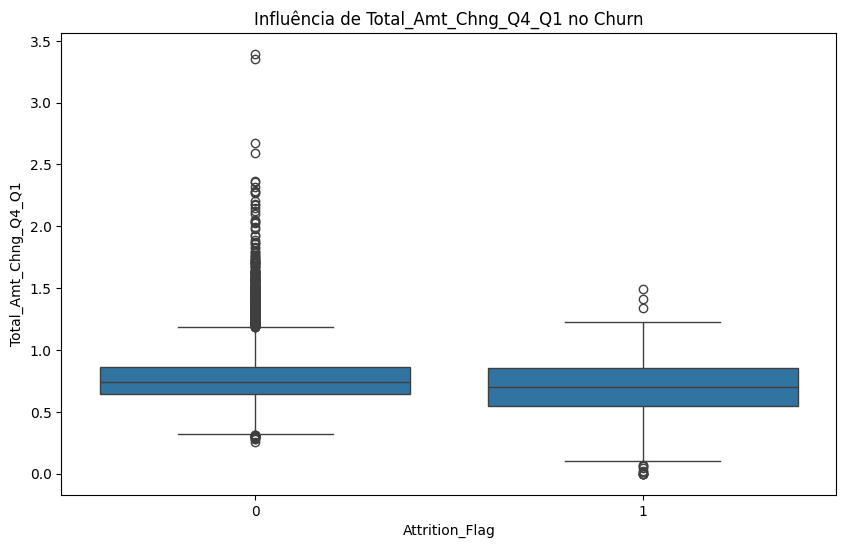

In [28]:
# Insights a partir das características mais importantes
top_features = feature_importance.head(10).index

for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Attrition_Flag', y=feature, data=data)
    plt.title(f'Influência de {feature} no Churn')
    plt.show()

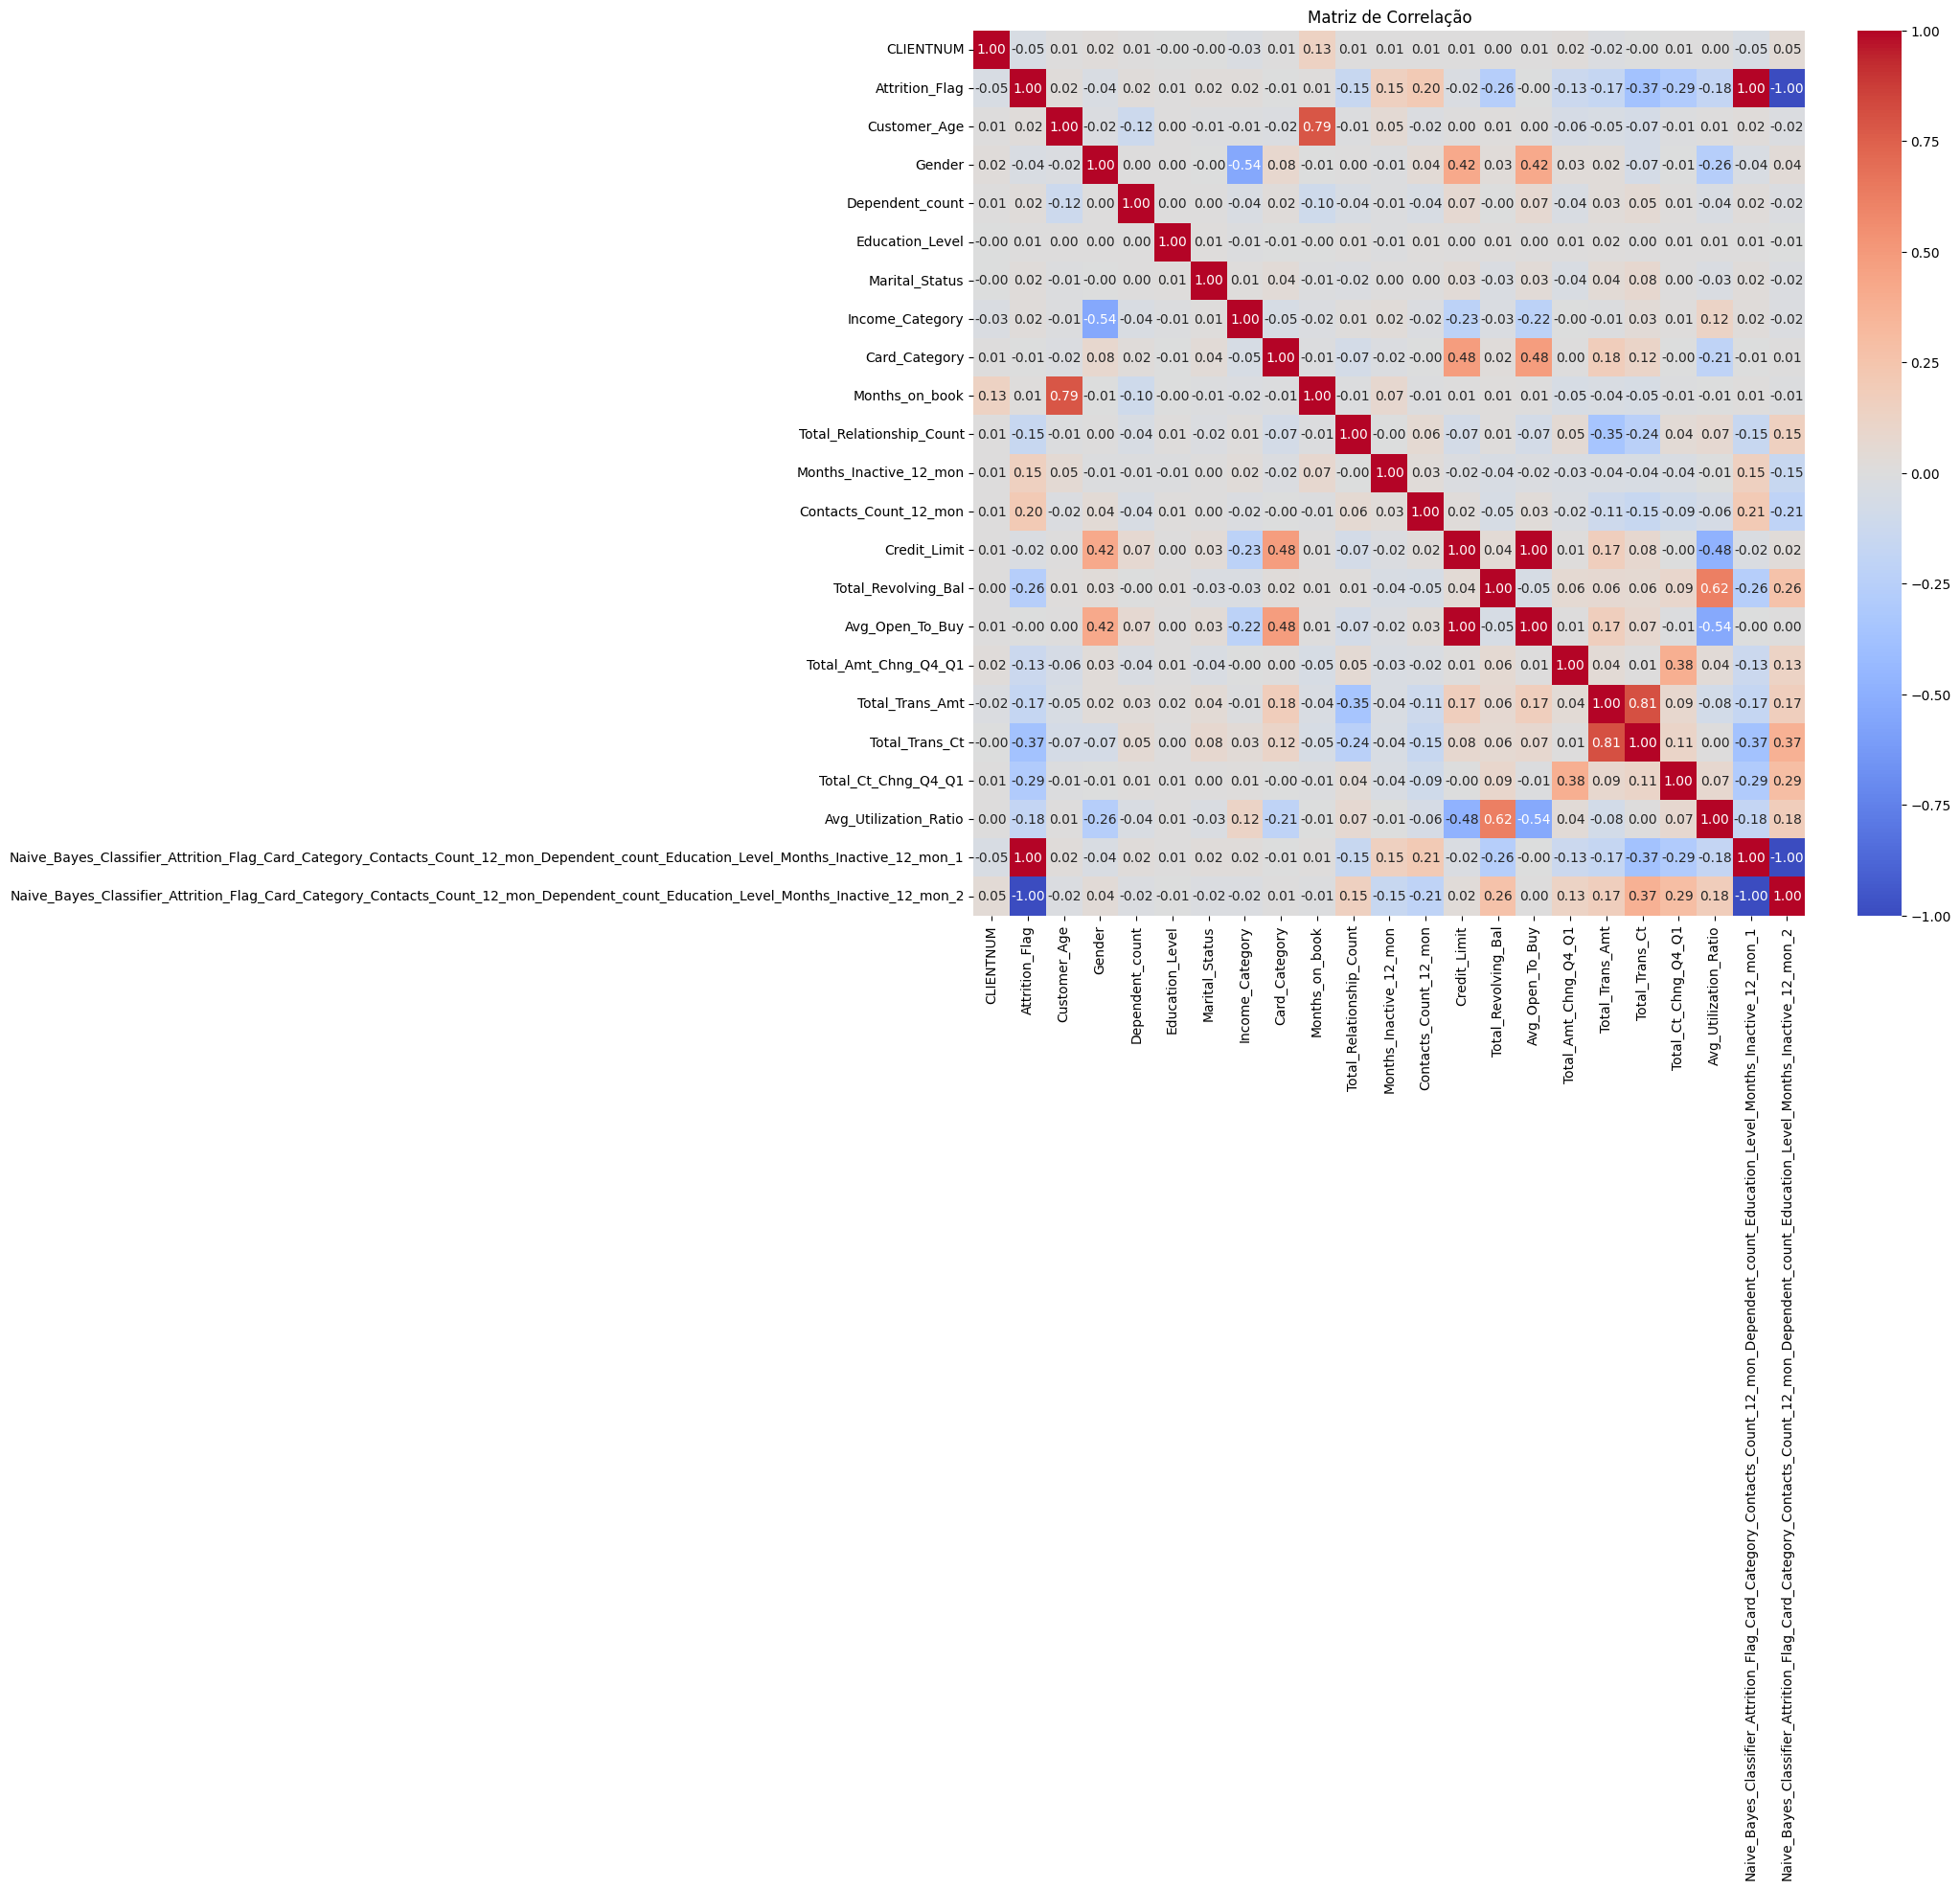

In [29]:
# Insights adicionais
# Correlação entre variáveis
plt.figure(figsize=(14, 12))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

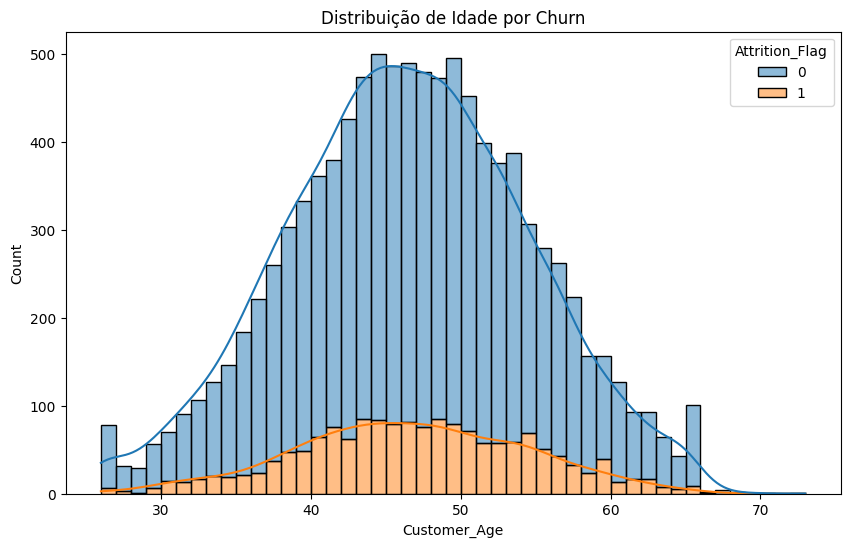

In [30]:
# Distribuição de clientes por idade e churn
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Customer_Age', hue='Attrition_Flag', multiple='stack', kde=True)
plt.title('Distribuição de Idade por Churn')
plt.show()


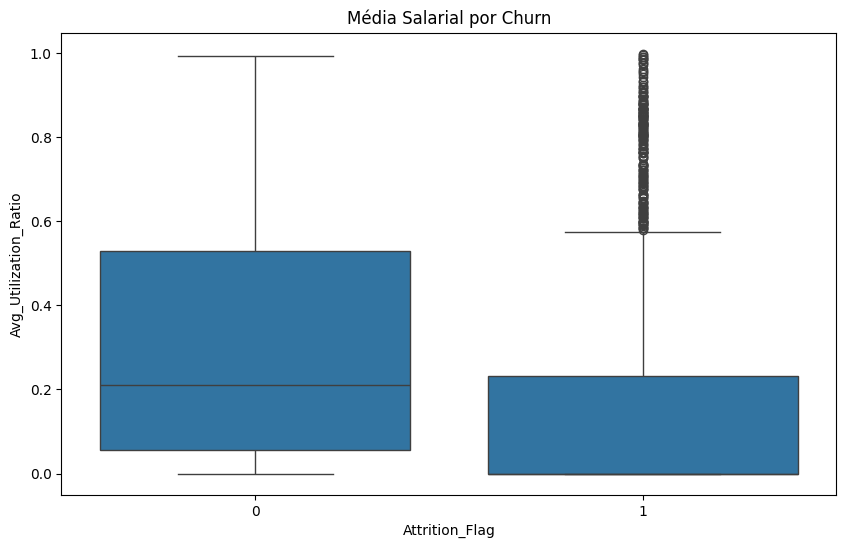

In [31]:
# Média salarial por churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_Flag', y='Avg_Utilization_Ratio', data=data)
plt.title('Média Salarial por Churn')
plt.show()

In [32]:
pip install sweetviz

In [33]:
import sweetviz as sv
import pandas as pd

In [34]:
report = sv.analyze(data)

                                             |          | [  0%]   00:00 -> (? left)

In [37]:
report.show_html('eda_report.html')

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# Link Vizualizador

file:///C:/Users/PC/Downloads/eda_report.html